# Homework #1 - The Linear Model

(This skeleton file is provided for HW#1 only.  You are expected to modify it for use in this and other homeworks for the course.)    

This is the README section for A0000000X's submission.
(For group submissions [when applicable], simply concatenate the student matric numbers in lexicographical order separated by a '-' (dash); e.g., A0000000X-A0000001Y)

### General Notes about this assignment 

Place your comments or requests here for the CS3244 staff to read.  Discuss your architecture or experiments in general.  A paragraph or two is usually sufficient.

### Files included with this submission

List the files in your submission here and provide a short 1 line description of each file.  Make sure your submission's files are named and formatted correctly.



## Programming Exercise 1

In [78]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

%matplotlib inline
# Plotting with style! 
import seaborn as sb 

# Size the plot appropriately for online display
pl.rcParams['figure.figsize'] = (12.0, 10.0)

Let's fix the random number generator first, in case we need results that are replicable.

In [30]:
nr.seed(3244)

In [55]:
#    Write your solution to the programming assignment here.  We've suggested some cells that you can add 
#    to your notebook as single line comments below.
#    Please place all of your cells to be run in a linear, unintervened order, such that we can automate
#    the running and grading of the assignment.

# load datasets code
rawX = np.load('X_train.npy') # 996,1850 of 996 sample 50,37 pixel image
rawY = np.load('y_train.npy') # 996 col vector
testX = np.load('X_test.npy') # test data

h = 50 # height of image
w = 37 # width of image
n_samples = rawX.shape[0]
n_features = rawX.shape[1]
n_classes = 7

x_train, x_vali, y_train, y_vali = train_test_split(rawX, rawY, test_size=0.25, random_state=42)

print (n_features)
print (x_train.shape)
print (x_vali.shape)
print (y_train.shape)
print (y_vali.shape)

1850
(724, 1850)
(242, 1850)
(724,)
(242,)


In [81]:
#http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html#sphx-glr-auto-examples-applications-face-recognition-py
#Reference link    
    
print("Extracting the top ? eigenfaces from %d faces"
      % ( x_train.shape[0]))

components = 322 # magic number to be determined , 100 gives about 0.8

pca = PCA(n_components = components, svd_solver='full', whiten=True).fit(x_train)
eigenfaces = pca.components_.reshape((components, h, w))

print(eigenfaces.shape)

print("Projecting the input data on the eigenfaces orthonormal basis")
x_train_pca = pca.transform(x_train)
x_vali_pca = pca.transform(x_vali)

print (x_train_pca.shape)
print (x_vali_pca.shape)

Extracting the top ? eigenfaces from 724 faces
(322, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
(724, 322)
(242, 322)


In [70]:
## By scikit svm classifier, can be fine tuned by gpyopt
print("Fitting the classifier to the training set")

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(x_train_pca, y_train)

print("Best estimator found by grid search:")
print(clf.best_estimator_)





Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [68]:
print("Predicting people's names on the test set")

y_pred = clf.predict(x_vali_pca)
print(y_pred.shape)

target_name = ['0','1','2','3','4','5','6']

print(classification_report(y_vali, y_pred, target_names=target_name))
print(confusion_matrix(y_vali, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
(242,)
             precision    recall  f1-score   support

          0       0.75      0.46      0.57        13
          1       0.83      0.85      0.84        40
          2       0.88      0.54      0.67        26
          3       0.78      0.96      0.86        92
          4       0.86      0.58      0.69        33
          5       1.00      0.82      0.90        11
          6       0.70      0.85      0.77        27

avg / total       0.81      0.80      0.79       242

[[ 6  0  1  5  1  0  0]
 [ 1 34  0  3  0  0  2]
 [ 0  2 14  7  0  0  3]
 [ 0  1  0 88  2  0  1]
 [ 1  4  1  5 19  0  3]
 [ 0  0  0  1  0  9  1]
 [ 0  0  0  4  0  0 23]]


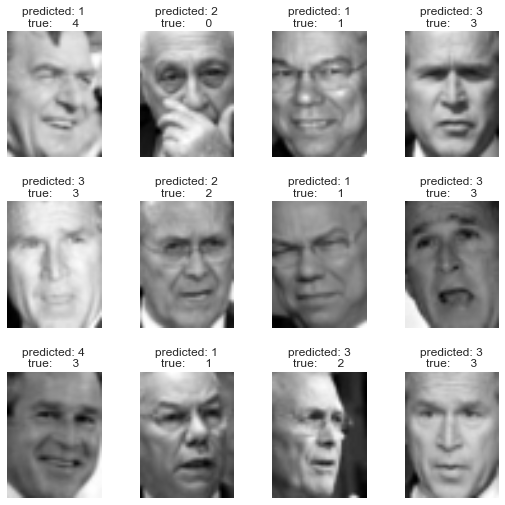

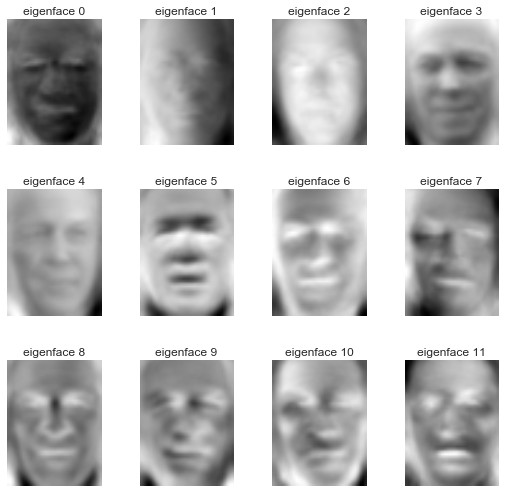

In [64]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]]
    true_name = target_names[y_test[i]]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_vali, target_name, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(x_vali, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [83]:
# Hmm, xgboost with pca is worst
model = xgb.XGBClassifier()
model.fit(x_train_pca, y_train)
# make predictions for test data
y_pred = model.predict(x_vali_pca)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_vali, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

(242,)
Accuracy: 56.20%


In [ ]:
## Statement of Individual Work

Please initial (between the square brackets) one of the following statements.

I, A0121261Y, certify that I have followed the CS 3244 Machine Learning class guidelines for homework assignments.  In particular, I expressly vow that I have followed the Facebook rule in discussing with others in doing the assignment and did not take notes (digital or printed) from the discussions.  


I suggest that I should be graded as follows:


### References

I have refered to the following list of people and websites in preparing my homework submission:

Prof Kan Min-Yen    
com100. (n.d.). Retrieved from https://emailmarketing.comm100.com/email-marketing-ebook/spam-words.aspx   
http://cilvr.cs.nyu.edu/diglib/lsml/bottou-sgd-tricks-2012.pdf
http://leon.bottou.org/publications/pdf/nimes-1991.pdf 
http://www.seas.upenn.edu/~sys502/extra_materials/MAXIMUM_LIKELIHOOD_ESTIMATION_2.pdf